In [1]:
#TOPIC : CREDIT CARD FRAUD DETECTION

'''
COMPONENTS / MODULES -- 
ARTIFICIAL NEURAL NETWORK (ANN)
'''

'\nCOMPONENTS / MODULES -- \nANN (ARTIFICIAL NEURAL NETWORK)\n'

In [8]:
#Importing Necessary Libraries

import pandas as ps
import numpy as ny
import matplotlib.pyplot as pylt
import seaborn as sbn

%matplotlib inline
sbn.set_style("whitegrid")

In [9]:
#Loading dataset from local

cred = ps.read_csv("D:\Projects\UnderGradProjects\Credit Card Fraud Detection System _ A Comparison study on various Machine Learning and Deep Learning Algorithms\creditcard.csv")
cred.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Lets Analyze the data from the dataset loaded

cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
ps.set_option("display.float","{:.2f}".format)
cred.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [6]:
#Lets hunt for the missing values in the dataset. (NULL VALUES)
#Missing values create a lot of problem in analysis.

cred.isnull().sum().sum()

0

In [7]:
cred.columns()

TypeError: 'Index' object is not callable

Text(0, 0.5, 'FREQUENCY')

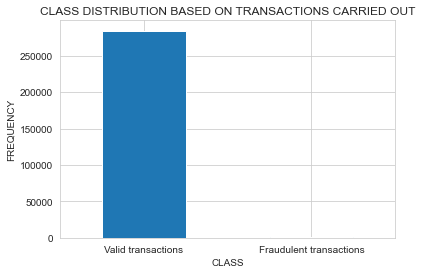

In [9]:
#Transformed Variables -- Time , Amount , Class (0 OR 1)

LABELS = ["Valid transactions", "Fraudulent transactions"]

count_classes = ps.value_counts(cred['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
pylt.title("CLASS DISTRIBUTION BASED ON TRANSACTIONS CARRIED OUT")
pylt.xticks(range(2), LABELS)
pylt.xlabel("CLASS")
pylt.ylabel("FREQUENCY")

In [10]:
cred.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
# In the above execution , 0 means valid transactions , 1 means invalid OR fraudulent 
# transaction. Thus we can see there are 284315 valid transactions
# and 492 fraudulent transactions , which is accounting 0.17% of the total transactions

In [1]:
# As the number of valid transactions are significantly high , the model shall assume
# that theere are no frauds. But assumption for / by a model is dangerous.

In [11]:
#Lets again obtain the valid and fraudulent transactions
fraud = cred[cred['Class'] == 1]
valid = cred[cred['Class'] == 0]

print(f"Fraudulent Transactions Shape : {fraud.shape}")
print(f"Valid Transactions Shape : {valid.shape}")

Fraudulent Transactions Shape : (492, 31)
Valid Transactions Shape : (284315, 31)


In [14]:
#Amount of money used in different transaction classes (valid and fraud)

ps.concat([fraud.Amount.describe() , valid.Amount.describe()] , axis = 1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [15]:
#Checking time frame of fraudulent transactions

ps.concat([fraud.Time.describe(), valid.Time.describe()], axis=1)

,Time,Time
count,492.000000,284315.000000
mean,80746.806911,94838.202258
std,47835.365138,47484.015786
min,406.000000,0.000000
25%,41241.500000,54230.000000
50%,75568.500000,84711.000000
75%,128483.000000,139333.000000
max,170348.000000,172792.000000


C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


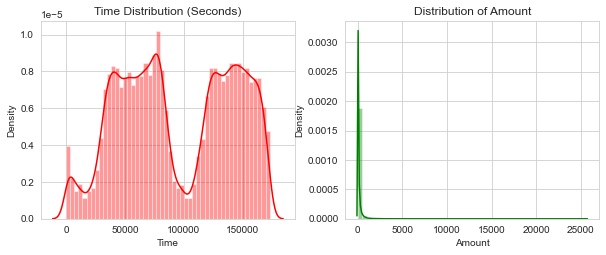

In [23]:
#Lets Plot the above execution , i.e., the Time feature / Variable / Atrribute

pylt.figure(figsize=(10,8))

pylt.subplot(2, 2, 1)
pylt.title('Time Distribution (Seconds)')

sbn.distplot(cred['Time'], color='red');


#Lets plot the amount feature

pylt.subplot(2, 2, 2)
pylt.title('Distribution of Amount')
sbn.distplot(cred['Amount'],color='green');

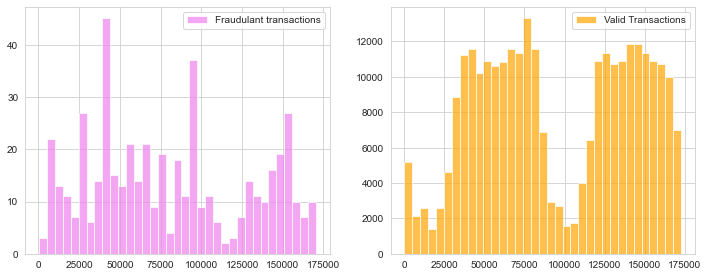

In [27]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
pylt.figure(figsize=(12, 10))

pylt.subplot(2, 2, 1)
cred[cred.Class == 1].Time.hist(bins=35, color='violet', alpha=0.7, label="Fraudulant transactions")

pylt.legend()

pylt.subplot(2, 2, 2)
cred[cred.Class == 0].Time.hist(bins=35, color='orange', alpha=0.7, label="Valid Transactions")

pylt.legend()

In [28]:
#Thus , from the above graphs , it is clear that Time is not at all a factor 
#to be analyzed or work upon to reduce the loss. 

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

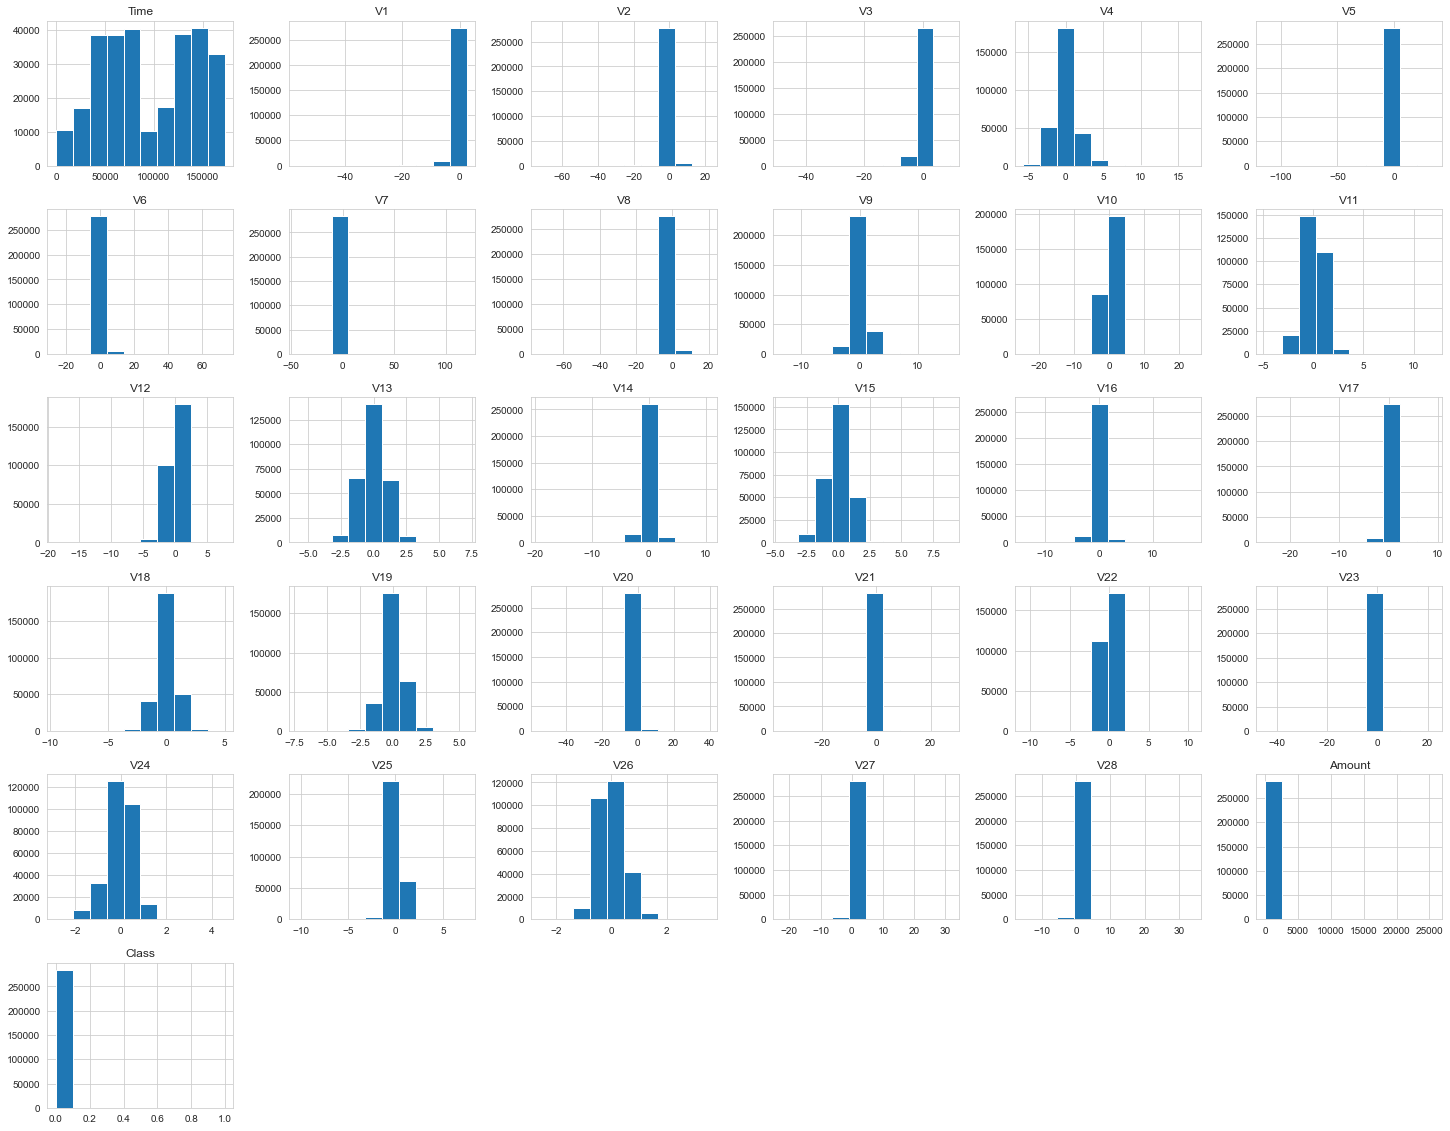

In [31]:
#Now let us create sample from the dataset for modelling and testing purpose.

cred.hist(figsize = (25,20))

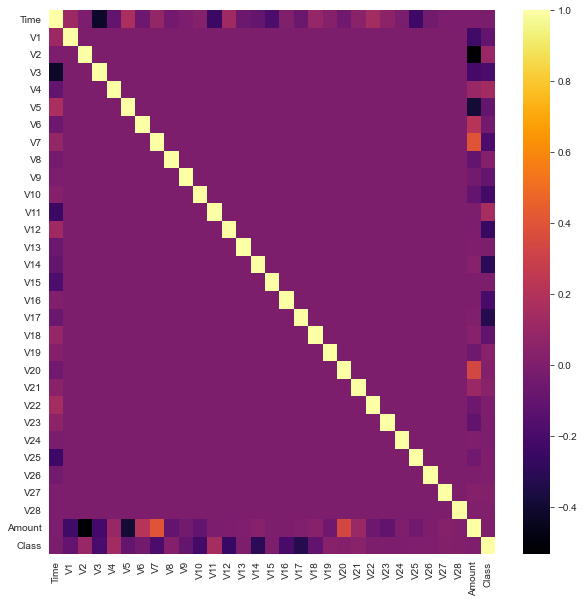

In [37]:
#Lets create the heatmap (for correlation among the features)

pylt.figure(figsize=(10,10))
sbn.heatmap(data=cred.corr(), cmap="inferno")
pylt.show()

In [39]:
#If we check the highest correlations among all the features , the following would be the #results -- 

'''
Time and V3 : -0.42
Amount and V2 : -0.53
Amount and V4 : 0.4
'''

'\nTime and V3 : -0.42\nAmount and V2 : -0.53\nAmount and V4 : 0.4\n'

In [40]:
#Lets do some data pre-processing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = cred.drop('Class', axis=1)
Y = cred.Class

X_train_v, X_test, Y_train_v, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train_v, Y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = Y_train.value_counts()[0] / len(Y_train)
w_n = Y_train.value_counts()[1] / len(Y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Valid transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Valid transaction weight: 0.9982005254214972


In [41]:
print(f"TRAINING : X_train : {X_train.shape}, Y_train : {Y_train.shape}\n{'_'*55}")
print(f"VALIDATION : X_validate : {X_validate.shape}, y_validate : {Y_validate.shape}\n{'_'*50}")
print(f"TESTING : X_test : {X_test.shape}, y_test: {Y_test.shape}")

TRAINING : X_train : (159491, 30), Y_train : (159491,)
_______________________________________________________
VALIDATION : X_validate : (39873, 30), y_validate : (39873,)
__________________________________________________
TESTING : X_test : (85443, 30), y_test: (85443,)


In [42]:
#Shape is a function which represent a tuple consisting Rows , Columns (in the same order as #written)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = ps.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_train, prediction)}\n")
        
    elif train==False:
        clf_report = ps.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

In [44]:
#NOW COMES THE BIG PART - CONSTRUCTING THE MODEL OF ARTIFICIAL NEURAL NETWORK (ANN)

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7936      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6

In [45]:
#Every Model has some performance and efficiency. 
#These can be measured via a number of evaluation metrics.
#Some of the most famous / trending metrics are used below.

METRICS = [
    keras.metrics.Accuracy(name='Accuracy'),
    keras.metrics.FalseNegatives(name='falseNeg'),
    keras.metrics.FalsePositives(name='falsePos'),
    keras.metrics.TrueNegatives(name='TrueNeg'),
    keras.metrics.TruePositives(name='Turepos'),
    keras.metrics.Precision(name='Precision'),
    keras.metrics.Recall(name='Recall') # Recall is also known as Sensitivity
]

model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, Y_train, 
    validation_data=(X_validate, Y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

cision: 0.9180 - val_Recall: 0.8116
Epoch 252/300
78/78 [==============================] - 5s 63ms/step - loss: 3.1329e-04 - Accuracy: 0.0042 - falseNeg: 11.0000 - falsePos: 7.0000 - TrueNeg: 159197.0000 - Turepos: 276.0000 - Precision: 0.9753 - Recall: 0.9617 - val_loss: 0.0082 - val_Accuracy: 0.0036 - val_falseNeg: 13.0000 - val_falsePos: 9.0000 - val_TrueNeg: 39795.0000 - val_Turepos: 56.0000 - val_Precision: 0.8615 - val_Recall: 0.8116
Epoch 253/300
78/78 [==============================] - 5s 59ms/step - loss: 5.5817e-04 - Accuracy: 0.0044 - falseNeg: 15.0000 - falsePos: 13.0000 - TrueNeg: 159191.0000 - Turepos: 272.0000 - Precision: 0.9544 - Recall: 0.9477 - val_loss: 0.0079 - val_Accuracy: 0.0032 - val_falseNeg: 13.0000 - val_falsePos: 8.0000 - val_TrueNeg: 39796.0000 - val_Turepos: 56.0000 - val_Precision: 0.8750 - val_Recall: 0.8116
Epoch 254/300
78/78 [==============================] - 5s 58ms/step - loss: 3.3823e-04 - Accuracy: 0.0033 - falseNeg: 8.0000 - falsePos: 5.0000 - T

In [47]:
score = model.evaluate(X_test, Y_test)
print(score)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0052 - Accuracy: 0.0029 - falseNeg: 24.0000 - falsePos: 17.0000 - TrueNeg: 85290.0000 - Turepos: 112.0000 - Precision: 0.8682 - Recall: 0.8235
[0.005233634263277054, 0.002949334681034088, 24.0, 17.0, 85290.0, 112.0, 0.8682170510292053, 0.8235294222831726]


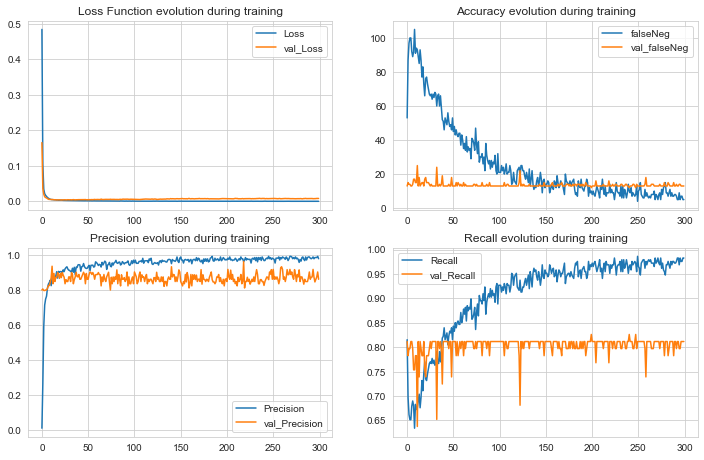

In [49]:
pylt.figure(figsize=(12, 16))

pylt.subplot(4, 2, 1)
pylt.plot(r.history['loss'], label='Loss')
pylt.plot(r.history['val_loss'], label='val_Loss')
pylt.title('Loss Function evolution during training')
pylt.legend()

pylt.subplot(4, 2, 2)
pylt.plot(r.history['falseNeg'], label='falseNeg')
pylt.plot(r.history['val_falseNeg'], label='val_falseNeg')
pylt.title('Accuracy evolution during training')
pylt.legend()

pylt.subplot(4, 2, 3)
pylt.plot(r.history['Precision'], label='Precision')
pylt.plot(r.history['val_Precision'], label='val_Precision')
pylt.title('Precision evolution during training')
pylt.legend()

pylt.subplot(4, 2, 4)
pylt.plot(r.history['Recall'], label='Recall')
pylt.plot(r.history['val_Recall'], label='val_Recall')
pylt.title('Recall evolution during training')
pylt.legend()

In [54]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print_score(Y_train, Y_train_pred.round(), train=True)
print_score(Y_test, Y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(Y_train, Y_train_pred.round()),
        'Test': f1_score(Y_test, Y_test_pred.round()),
    },
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999994    0.993056  0.999981       0.996525       0.999981
recall          0.999987    0.996516  0.999981       0.998252       0.999981
f1-score        0.999991    0.994783  0.999981       0.997387       0.999981
support    159204.000000  287.000000  0.999981  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159202      2]
 [     1    286]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999719    0.868217   0.99952      0.933968      0.999509
recall         0.999801    0.823529   0.99952      0.911665      0.999520
f1-score       0.999760    0.845283   0.99952      0.922521      0.999514

In [55]:
#Thus , we conclude the Model training and testing of ANN

In [57]:
#Though we have already created model for Random Forest earlier , still we want to test here
#how much it differs

from sklearn.ensemble import RandomForestClassifier

ranfor_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
ranfor_clf.fit(X_train, Y_train)

Y_train_pred = ranfor_clf.predict(X_train)
Y_test_pred = ranfor_clf.predict(X_test)

print_score(Y_train, Y_train_pred, train=True)
print_score(Y_test, Y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(Y_train,Y_train_pred),
        'Test': f1_score(Y_test, Y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    159204.0  287.0       1.0   159491.0      159491.0
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999695    0.924370   0.99959      0.962033      0.999575
recall         0.999894    0.808824   0.99959      0.904359      0.999590
f1-score       0.999795    0.862745   0.99959      0.931270      0.999577
support    85307.000000  136.000000   0.99959  85443.000000  85443.000000


In [ ]:
#Thus ,we conclude the model of Random Forest (second). 